In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds=pd.read_csv('simple_LR_dataset.csv')
ds.head()

,Volume,Price
0,10,20
1,11,25
2,14,26
3,16,27
4,17,24


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Volume  22 non-null     int64
 1   Price   22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes


In [4]:
#x=ds.iloc[:,:-1].values #Volume
#x=ds.iloc[:,0:1].values #Volume
x=ds.iloc[:,[0]].values 
y=ds.iloc[:,1].values #Price
#print(x)
#print(y)

In [5]:
#calculate the correlation coefficient for the dataset
# to check correlation between 
# correlation to measure linear relationship
corr = ds.corr()
print(corr)
# volume vs price=0.983426. highly correlated. thus linear relationship is very high

          Volume     Price
Volume  1.000000  0.983426
Price   0.983426  1.000000


In [6]:
#splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [7]:
# step 2 simple linear regression
#Fitting simple linear regression to training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('Coefficients,beta:', regressor.coef_)
print('Constant,alpha:', regressor.predict([[0]]))

Coefficients,beta: [0.86720851]
Constant,alpha: [14.18635962]


In [8]:
#Predicting the results for test set
y_pred=regressor.predict(x_test)
print(y_pred)
print(y_test)

[73.15653798 37.60098927 47.14028282 44.53865731 23.72565318]
[70 40 48 50 25]


In [9]:
#calculate the correlation coefficient
# to check highly correlated
corr=np.corrcoef(y_pred, y_test)
print(corr)

[[1.        0.9885554]
 [0.9885554 1.       ]]


In [10]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print(MSE)

9.581664392196343


In [11]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
corr = df.corr()
print(corr)

             Actual  Predicted
Actual     1.000000   0.988555
Predicted  0.988555   1.000000


Text(0, 0.5, 'Price')

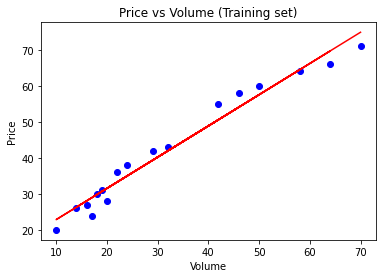

In [12]:
#Visualizing training set result
plt.scatter(x_train,y_train,color='blue') # plot the points
plt.plot(x_train, regressor.predict(x_train),color='red')# plot the line
plt.title('Price vs Volume (Training set)')
plt.xlabel('Volume')
plt.ylabel('Price')

In [13]:
y_pred=regressor.predict([[26]])
print(y_pred)

[36.73378076]
